In [61]:
import os
import tensorflow as tf

In [62]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [63]:
import cv2
import imghdr

In [64]:
data_dir = 'Image_Data' 

In [65]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [66]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [67]:
import numpy as np
from matplotlib import pyplot as plt

In [68]:
data = tf.keras.utils.image_dataset_from_directory('Image_Data')

Found 197 files belonging to 2 classes.


In [69]:
import cv2

In [70]:
data_iterator = data.as_numpy_iterator()

In [71]:
batch = data_iterator.next()

In [72]:
len(batch)

2

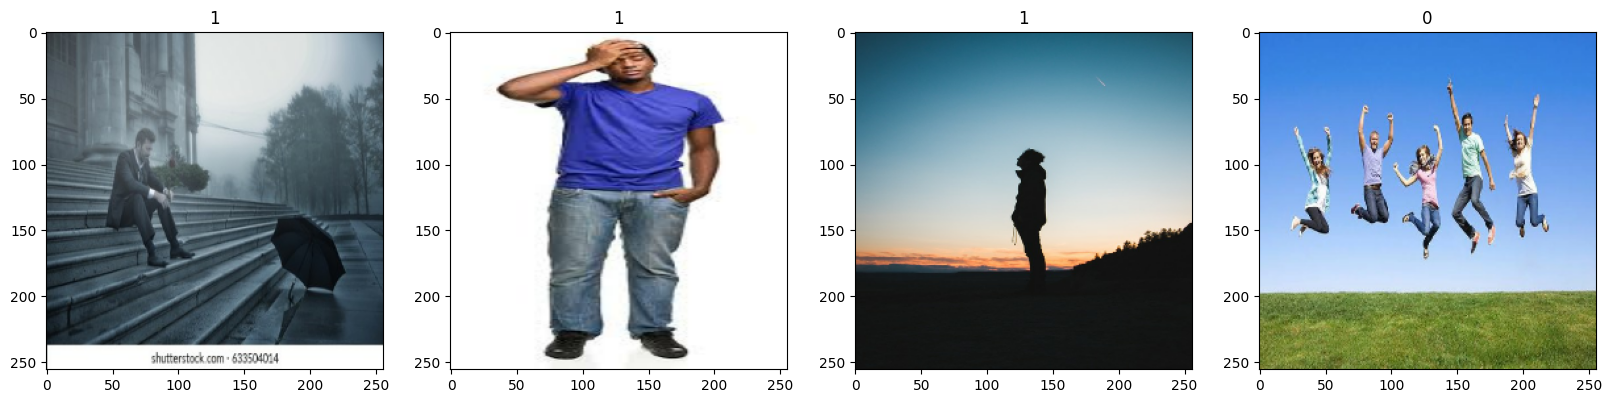

In [73]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [74]:
data = data.map(lambda x,y: (x/255, y))

In [75]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [76]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [77]:
train_size

4

In [78]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [79]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [81]:
model= Sequential()

In [82]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
logdir = "logs"

In [86]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [87]:

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 568ms/step - accuracy: 0.4792 - loss: 2.4849 - val_accuracy: 0.5000 - val_loss: 0.8058
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 668ms/step - accuracy: 0.4563 - loss: 0.8030 - val_accuracy: 0.7500 - val_loss: 0.6790
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 680ms/step - accuracy: 0.5719 - loss: 0.6851 - val_accuracy: 0.5312 - val_loss: 0.6829
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 667ms/step - accuracy: 0.5625 - loss: 0.6719 - val_accuracy: 0.5312 - val_loss: 0.6701
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 747ms/step - accuracy: 0.5146 - loss: 0.6551 - val_accuracy: 0.5625 - val_loss: 0.5962
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 796ms/step - accuracy: 0.5583 - loss: 0.5917 - val_accuracy: 0.7500 - val_loss: 0.5399
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 781ms/step - accuracy: 0.7208 - loss: 0.5472 - val_accuracy: 0.9062 - val_loss: 0.4950
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 694ms/step - accuracy: 0.8333 - loss: 0.4787 - val_accuracy: 0.8438 - val_loss:

In [88]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [89]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [90]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [91]:

print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [92]:
import cv2

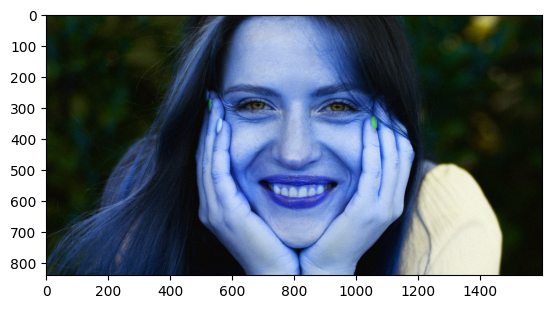

In [98]:
img = cv2.imread(r"C:\Users\LENOVO\OneDrive\Desktop\New Start Winter Arc Skill Set\Image_Data\Happy\genuinely-happy-person.png")
plt.imshow(img)
plt.show()

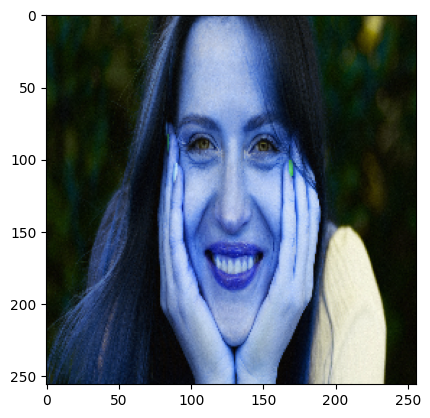

In [99]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [100]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [101]:
yhat

array([[0.1837867]], dtype=float32)

In [102]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [103]:
from tensorflow.keras.models import load_model

In [106]:
model.save(os.path.join('model','image_classifier_happy-sad.h5'))

In [ ]:
new_model = load_model('image_classifier_happy-sad.h5')